In [1]:
# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [99]:
# Load and preprocess MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype(np.int32)  # Convert labels to integers

Aapka training dataset ka class distribution hai:

Digit	Count
0	5560
1	6277
2	5610
3	5708
4	5529
5	5040
6	5480
7	5790
8	5468
9	5538

✅ Observation:
No serious imbalance hai. Sab digits approx 5000–6300 range mein hain.

Digit 1 thoda zyada hai (6277), 5 thoda kam (5040), but overall it’s a balanced dataset.


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Step 4: Define DBN pipeline
rbm1 = BernoulliRBM(n_components=256, learning_rate=0.01, batch_size=64, n_iter=10, verbose=True, random_state=42)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.01, batch_size=64, n_iter=10, verbose=True, random_state=42)
logistic = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')
dbn = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('logistic', logistic)])

In [ ]:
# Step 5: Train the DBN
dbn.fit(X_train, y_train)  

[BernoulliRBM] Iteration 1, pseudo-likelihood = -142.92, time = 15.82s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -122.90, time = 15.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -112.00, time = 15.59s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -105.23, time = 17.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -100.05, time = 13.47s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -96.30, time = 13.72s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -93.07, time = 15.88s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -90.61, time = 16.89s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -88.04, time = 16.18s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -86.20, time = 14.64s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -107.19, time = 4.49s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -91.61, time = 6.32s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -84.16, time = 7.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -78.76, time = 5.31s
[BernoulliRBM] It

c:\Users\falcon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\falcon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('rbm1',
                 BernoulliRBM(batch_size=64, learning_rate=0.01,
                              random_state=42, verbose=True)),
                ('rbm2',
                 BernoulliRBM(batch_size=64, learning_rate=0.01,
                              n_components=128, random_state=42,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(max_iter=200, multi_class='multinomial'))])

In [103]:
# Step 6: Evaluate
acc_train = accuracy_score(y_train, dbn.predict(X_train))
acc_test = accuracy_score(y_test, dbn.predict(X_test))
print(f"Training accuracy: {acc_train:.4f}")
print(f"Test accuracy: {acc_test:.4f}")

Training accuracy: 0.9489
Test accuracy: 0.9439


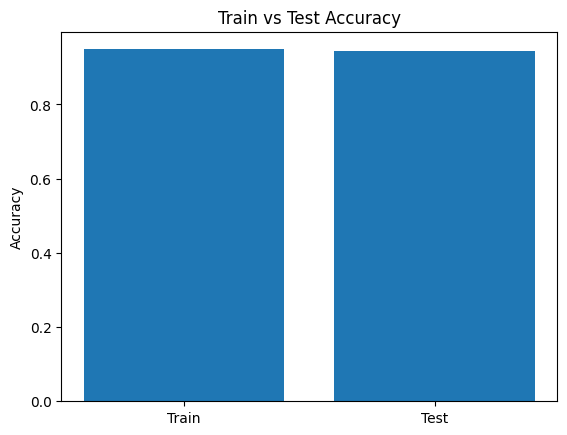

In [104]:
plt.figure()
plt.bar(['Train', 'Test'], [acc_train, acc_test])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()


Summary:
Overfitting / Underfitting check
Gap = Training – Test = 94.89% – 94.39% = 0.50%

Sirf aadha percent ka difference hai, jo bohat chhota hai.

Matlab: Model na to zyada overfit hua, na hi underfit.
Yani model ne jo data pe train kiya us pe ~95% sahi predict kiya, aur unseen test data pe bhi ~94.4% sahi predict kara.

94.39% test accuracy ek simple DBN ke liye “acha” hi hai.

Overfitting minimal hai, gap sirf 0.5%.

Agar zyada performance chahiye to hyperparameters tune karein ya advanced architectures (CNN) explore karein.

In [105]:

rbm1 = BernoulliRBM(n_components=512, learning_rate=0.05,
                    batch_size=100, n_iter=20, verbose=True, random_state=42)
rbm2 = BernoulliRBM(n_components=256, learning_rate=0.05,
                    batch_size=100, n_iter=20, verbose=True, random_state=42)
rbm3 = BernoulliRBM(n_components=128, learning_rate=0.05,
                    batch_size=100, n_iter=20, verbose=True, random_state=42)

logistic = LogisticRegression(max_iter=300, C=0.1,
                              solver='lbfgs', multi_class='multinomial')

dbn = Pipeline([
    ('rbm1', rbm1),
    ('rbm2', rbm2),
    ('rbm3', rbm3),
    ('logistic', logistic)
])

In [106]:
# Step 5: Train DBN and evaluate
dbn.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -104.81, time = 23.60s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -90.11, time = 24.11s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -81.23, time = 22.72s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -77.18, time = 23.91s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -74.48, time = 34.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -71.48, time = 36.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -69.79, time = 21.16s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -68.35, time = 21.21s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -67.28, time = 21.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -66.57, time = 22.08s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -65.58, time = 24.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -65.36, time = 22.35s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -64.54, time = 28.87s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -63.77, time = 20.54s
[BernoulliRBM]

c:\Users\falcon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('rbm1',
                 BernoulliRBM(batch_size=100, learning_rate=0.05,
                              n_components=512, n_iter=20, random_state=42,
                              verbose=True)),
                ('rbm2',
                 BernoulliRBM(batch_size=100, learning_rate=0.05, n_iter=20,
                              random_state=42, verbose=True)),
                ('rbm3',
                 BernoulliRBM(batch_size=100, learning_rate=0.05,
                              n_components=128, n_iter=20, random_state=42,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=0.1, max_iter=300,
                                    multi_class='multinomial'))])

In [107]:
acc_train = accuracy_score(y_train, dbn.predict(X_train))
acc_test  = accuracy_score(y_test,  dbn.predict(X_test))

In [108]:
print(f"Training accuracy: {acc_train:.4f}")
print(f"Test accuracy: {acc_test:.4f}")

Training accuracy: 0.9603
Test accuracy: 0.9584


Improved Deep Belief Network ne training accuracy 96.03% aur test accuracy 95.84% hasil ki, jo pehle model (94.89% train, 94.39% test) se behtar hai. Nai architecture mein zyada RBM layers, hidden units, aur training iterations ne feature learning improve ki. Saath hi, logistic regression mein regularization add karne se overfitting control hui. Accuracy ka gap bhi kam hua (0.50% se 0.19%), jo model ki better generalization ko show karta hai. Overall, improved model zyada accurate aur reliable sabit hua.

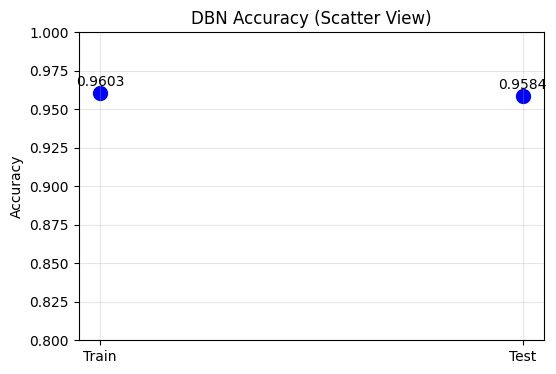

In [109]:
labels = ['Train', 'Test']
scores = [acc_train, acc_test]

plt.figure(figsize=(6, 4))
plt.scatter(labels, scores, color='blue', s=100)  # s = size of points
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('DBN Accuracy (Scatter View)')
plt.grid(alpha=0.3)

# Annotate accuracy values on top of each point
for i, score in enumerate(scores):
    plt.text(labels[i], score + 0.005, f"{score:.4f}", ha='center', fontsize=10)

plt.show()


In [ ]:
from tensorflow.keras.models import save_model
save_model(model, 'mnist_model.h5')


In [23]:
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow warnings


# Disable retracing warning
tf.get_logger().setLevel('ERROR')

# Step 1: File path
#img_path = 'E:/Computer_Vision/eight.png'
img_path = 'E:/Computer_Vision/one.jpg'



In [24]:
# Step 2: Load and convert to grayscale
img = Image.open(img_path).convert('L')

# Step 3: Resize
img = img.resize((28, 28), Image.Resampling.LANCZOS)

# Step 4: Convert to array and normalize
img_arr = np.array(img) / 255.0

# Step 5: Reshape for model (CNNs need 4D input)
img_arr = img_arr.reshape(1, 28, 28, 1)


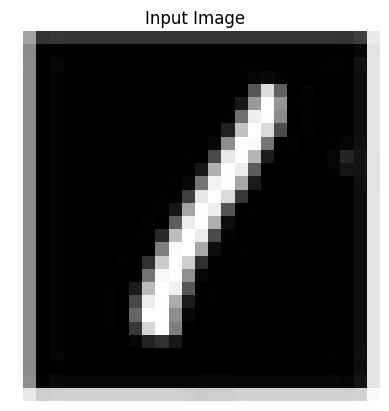

In [25]:
# Step 6: Show input image
plt.imshow(img_arr.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Input Image')
plt.show()



In [26]:
# Step 7: Load model
model = load_model('E:/Computer_Vision/mnist_model.h5', compile=False)

# Step 8: Predict
pred = model.predict(img_arr)
predicted_label = np.argmax(pred)

# Step 9: Show result
print("Predicted digit:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted digit: 1
